In [1]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
# Summary database
# base_url = 'https://api.opencovid.ca/timeseries'
# response = requests.get(base_url).json()
# pprint(response)

In [3]:
# response['data']['tests_completed']
# print(response.keys())
# print(response['data']['hospitalizations'][0]['region'])
# print(response['data']['deaths'][0]['value'])
# print(response['data']['deaths'][0]['value_daily'])

In [4]:
# Summary database
# base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
# response = requests.get(base_url).json()

In [5]:
# response['data']

# Fetching the data from API

In [6]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
provinces = []
for province in response['data']:
    provinces.append(province['region'])
print(provinces)   

['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [7]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [8]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day
0,AB,2020-03-05,1,1
1,AB,2020-03-06,1,0
2,AB,2020-03-07,2,1
3,AB,2020-03-08,3,1
4,AB,2020-03-09,7,4
...,...,...,...,...
14005,YT,2022-11-06,5578,5
14006,YT,2022-11-07,5581,3
14007,YT,2022-11-08,5582,1
14008,YT,2022-11-09,5582,0


In [9]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [10]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df

,Province,Date,Cumulative death cases,Deaths per day
0,AB,2020-03-08,0,0
1,AB,2020-03-09,0,0
2,AB,2020-03-10,0,0
3,AB,2020-03-11,0,0
4,AB,2020-03-12,0,0
...,...,...,...,...
13907,YT,2022-11-01,32,0
13908,YT,2022-11-02,32,0
13909,YT,2022-11-03,32,0
13910,YT,2022-11-04,32,0


In [11]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [12]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df

,Province,Date,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-01-25,0,0
1,AB,2020-01-26,0,0
2,AB,2020-01-27,0,0
3,AB,2020-01-28,0,0
4,AB,2020-01-29,0,0
...,...,...,...,...
13781,YT,2022-11-13,0,0
13782,YT,2022-11-14,0,0
13783,YT,2022-11-15,0,0
13784,YT,2022-11-16,0,0


In [13]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
covid_combined_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13047,YT,2022-11-01,5556,3,32,0,0,0
13048,YT,2022-11-02,5560,4,32,0,0,0
13049,YT,2022-11-03,5564,4,32,0,0,0
13050,YT,2022-11-04,5566,2,32,0,0,0


In [14]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13047,YT,2022-11-01,5556,3,32,0,0,0
13048,YT,2022-11-02,5560,4,32,0,0,0
13049,YT,2022-11-03,5564,4,32,0,0,0
13050,YT,2022-11-04,5566,2,32,0,0,0


In [15]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
2341,MB,2020-07-05,325,0,7,0,0,0,2.154,NaN
2830,MB,2021-11-06,64391,177,1266,3,88,0,1.966,1.695
9637,PE,2021-10-02,302,0,0,0,0,0,0.000,NaN
2111,BC,2022-11-29,389962,98,4680,0,328,0,1.200,0.000
7670,NU,2021-07-11,657,0,4,0,0,0,0.609,NaN
4344,NL,2020-04-04,203,8,1,0,11,0,0.493,0.000
11986,SK,2022-08-06,138968,0,1448,0,147,0,1.042,NaN
5644,NS,2021-02-20,1608,4,65,0,0,0,4.042,0.000
11017,QC,2022-12-05,1250485,717,17408,10,1937,0,1.392,1.395
12402,YT,2021-01-25,83,0,1,0,0,0,1.205,NaN


In [16]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [17]:
# storing the output file as Covid19_data_Output
covid_combined_final_sorted.to_csv("Output/Covid19_data_Output.csv", index=False)

In [18]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

# Final DataFrame output for further studies

In [19]:
covid_combined_final_sorted_filled.to_csv("Output/Covid19_data_Output2.csv", index=False)

In [20]:
covid_dataframe_df = covid_combined_final_sorted_filled
covid_dataframe_df.head(5)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
6280,NT,2020-01-31,0,0,0,0,0,0,0.0,0.0
9027,PE,2020-01-31,0,0,0,0,0,0,0.0,0.0
7143,NU,2020-01-31,0,0,0,0,0,0,0.0,0.0
6281,NT,2020-02-01,0,0,0,0,0,0,0.0,0.0
9028,PE,2020-02-01,0,0,0,0,0,0,0.0,0.0


In [21]:
covid_dataframe_df['Active Cases'] = covid_dataframe_df['Cumulative confirmed cases'] - (covid_dataframe_df['Cumulative death cases'] + covid_dataframe_df['Cumulative hospitalizations cases'])
covid_dataframe_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Active Cases
12690,YT,2021-11-09,1248,29,10,0,0,0,0.801,0.000,1238
9360,PE,2020-12-29,96,2,0,0,0,0,0.000,0.000,96
3018,MB,2022-05-13,142875,0,1847,0,579,0,1.293,0.000,140449
6870,NT,2021-09-12,591,0,1,0,16,0,0.169,0.000,574
6181,NS,2022-08-11,58732,262,473,0,44,0,0.805,0.000,58215
3184,MB,2022-10-26,151319,0,2211,0,291,0,1.461,0.000,148817
7095,NT,2022-04-25,11286,69,22,0,0,0,0.195,0.000,11264
6054,NS,2022-04-06,47123,0,263,0,51,0,0.558,0.000,46809
6993,NT,2022-01-13,3587,120,12,0,0,0,0.335,0.000,3575
2468,MB,2020-11-09,8562,343,130,8,192,19,1.518,2.332,8240


In [22]:
Highest_active_province = covid_dataframe_df.groupby('Province').max()[['Active Cases', 'Date']].sort_values(['Active Cases'], ascending = False).reset_index()
Highest_active_province_df = Highest_active_province.set_index('Province')['Active Cases']
top_5_active_province = Highest_active_province_df.iloc[0:5]
top_5_active_province

Province
ON    1588656
QC    1301112
AB     624315
BC     392070
MB     152384
Name: Active Cases, dtype: int64

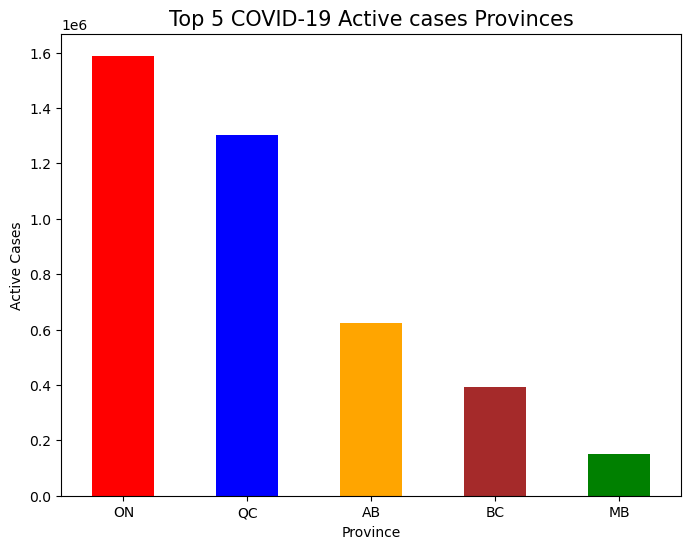

In [23]:
# set the colors for the bars
colors = ['red', 'blue', 'orange', 'brown', 'green']
ax = top_5_active_province.plot(kind='bar', figsize=(8,6), color = colors, rot=0)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Active Cases')
ax.set_title("Top 5 COVID-19 Active cases Provinces", size = 15)
ax.set_yscale('linear')
# display the plot
plt.show()

In [24]:
Death_province = covid_dataframe_df.groupby('Province').max()[['Cumulative death cases', 'Date']].sort_values(['Cumulative death cases'], ascending = False).reset_index()
Death_province = Death_province.iloc[0:5]
# Death_province_df = Death_province.set_index('Province')
Death_province_df = Death_province.set_index('Province')['Cumulative death cases']
Death_province_df

Province
QC    18181
ON    16351
AB     5643
BC     5339
MB     2470
Name: Cumulative death cases, dtype: int64

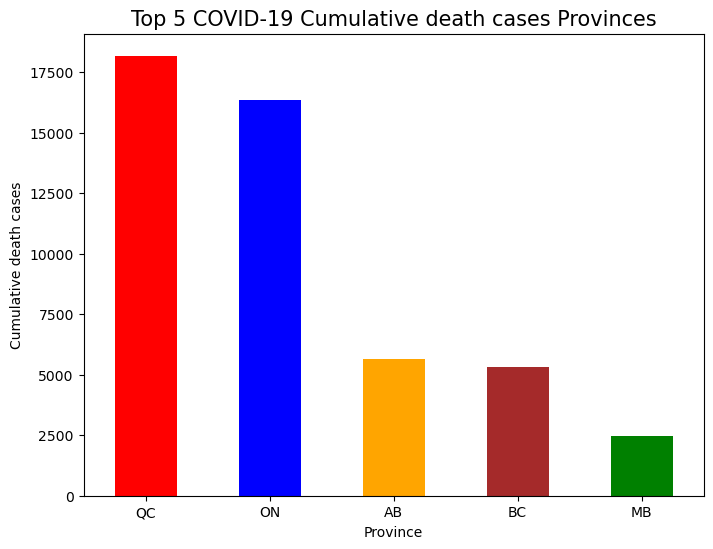

In [25]:
# set the colors for the bars
colors = ['red', 'blue', 'orange', 'brown', 'green']
ax = Death_province_df.plot(kind='bar', figsize=(8,6), color = colors, rot=0)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Cumulative death cases')
ax.set_title("Top 5 COVID-19 Cumulative death cases Provinces", size = 15)
ax.set_yscale('linear')
# display the plot
plt.show()

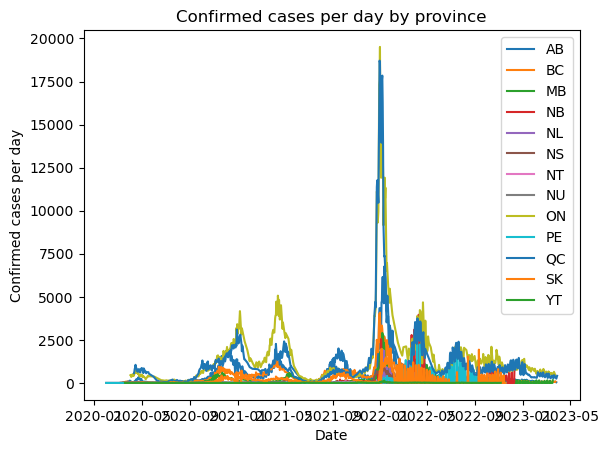

In [30]:
Line_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Confirmed cases per day']]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by province')
plt.legend()

# show the plot
plt.show()

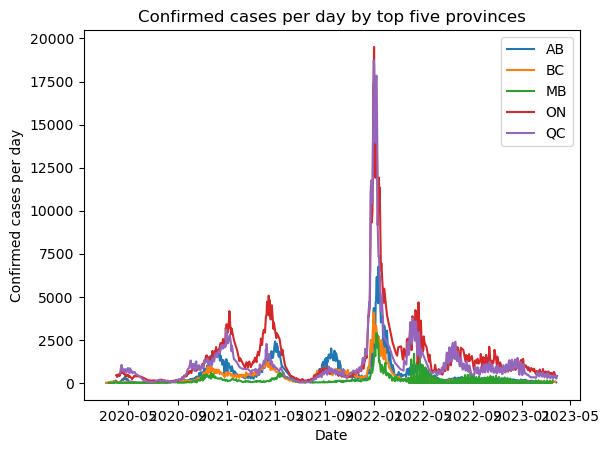

In [33]:
# calculate total confirmed cases for each province
totals = Line_plot_df.groupby('Province')['Confirmed cases per day'].sum().reset_index()
# sort by total confirmed cases and select top five provinces
top_five = totals.sort_values('Confirmed cases per day', ascending=False).head(5)['Province']
# filter dataframe to only include top five provinces
Line_plot_df = Line_plot_df[Line_plot_df['Province'].isin(top_five)]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by top five provinces')
plt.legend()
# show the plot
plt.show()

Enter desired provinces separated by commas: ON,AB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


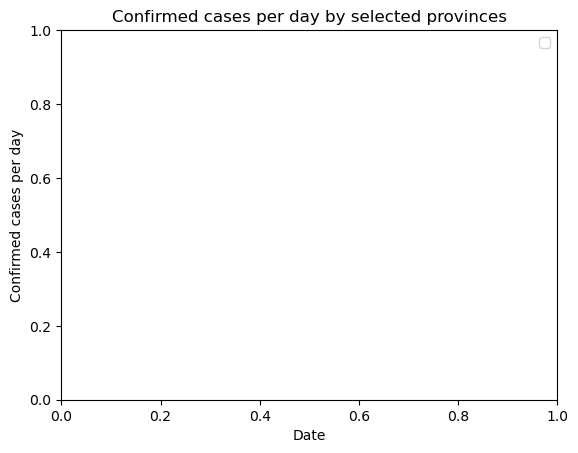

In [37]:
# allow user to input desired provinces
provinces = input("Enter desired provinces separated by commas: ").split(",")
# filter dataframe to only include desired provinces
Line_plot_df = Line_plot_df[Line_plot_df['Province'].isin(provinces)]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by selected provinces')
plt.legend()
# show the plot
plt.show()